<a href="https://colab.research.google.com/github/poojithamoganti/employee-churn-prediction/blob/main/Employee_churn_parita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all the required libraries and Classifiers

In [ ]:
import pandas as pd

import numpy as np

import warnings

from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier


To ignore all the warnings produced

In [ ]:
warnings.filterwarnings('ignore')

Creating a dataframe using pandas

In [ ]:
data = pd.read_csv('/content/employee_dataset/employee_attrition_train.csv')

# **Getting to know our data**





In [ ]:
data.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
70,NaN,No,Travel_Frequently,1199.0,Research & Development,18.0,4,Life Sciences,1,2049,...,4,80,2,10,2,4,10,2,0,2
80,38.0,No,Travel_Rarely,1404.0,Sales,1.0,3,Life Sciences,1,1961,...,1,80,0,20,3,2,1,0,0,0
481,31.0,No,Travel_Rarely,741.0,Research & Development,2.0,4,Life Sciences,1,1721,...,4,80,1,6,2,4,5,2,0,3
795,NaN,No,Travel_Rarely,157.0,Research & Development,1.0,3,Medical,1,1952,...,4,80,0,8,6,2,7,7,7,6
189,36.0,No,Travel_Frequently,469.0,Research & Development,NaN,3,Technical Degree,1,1257,...,3,80,0,12,2,2,11,10,0,7
69,NaN,No,Travel_Rarely,1169.0,Human Resources,8.0,2,Medical,1,869,...,4,80,1,6,6,3,5,1,0,4
768,46.0,No,Travel_Rarely,150.0,Research & Development,2.0,4,Technical Degree,1,1228,...,3,80,1,12,3,2,6,3,1,4
97,33.0,No,Travel_Rarely,267.0,Research & Development,21.0,3,Medical,1,1698,...,4,80,3,14,6,3,14,11,2,13
410,46.0,No,Travel_Rarely,1450.0,Research & Development,15.0,2,Life Sciences,1,1217,...,1,80,1,25,2,3,4,2,0,3
923,47.0,No,Travel_Rarely,202.0,Research & Development,2.0,2,Other,1,820,...,3,80,1,26,3,2,26,14,3,0


In [ ]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Find the shape of our dataset : no of rows & columns

In [ ]:
data.shape

(1029, 35)

Find indexing, datatypes and memory of our dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

Statistics of our data

In [ ]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,893.000000,1002.000000,934.000000,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,...,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,37.930571,800.528942,9.930407,2.892128,1.0,1024.367347,2.683188,66.680272,2.713314,2.043732,...,2.689990,80.0,0.822157,11.196307,2.782313,2.748299,6.942663,4.215743,2.119534,4.005831
std,9.395978,408.109828,8.421791,1.053541,0.0,606.301635,1.096829,20.474094,0.710146,1.118918,...,1.077767,0.0,0.874662,7.857581,1.283401,0.697278,6.068322,3.658595,3.108651,3.522574
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,458.250000,2.000000,2.000000,1.0,496.000000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,37.000000,801.500000,8.000000,3.000000,1.0,1019.000000,3.000000,67.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,44.000000,1162.000000,16.000000,4.000000,1.0,1553.000000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,60.000000,1496.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


# **Data Preprocessing**

Checking for Null values

In [ ]:
data.isnull().sum()

,0
Age,136
Attrition,0
BusinessTravel,5
DailyRate,27
Department,0
DistanceFromHome,95
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


Handling Null Values by dropping them

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [ ]:
data.shape

(775, 35)

Checking for duplicate values

In [ ]:
data.duplicated().any()

False

Lets consider Target feature as Attrition and visuailze it

<Axes: xlabel='Attrition'>

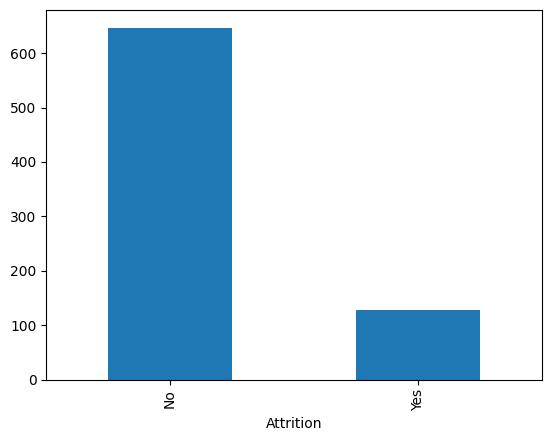

In [ ]:
data['Attrition'].value_counts().plot(kind='bar')

As we can see above bar grah, we identify it as an imbalenced dataset i.e our target data has uneven distributions of obeservations

As its not safe to only use Accuracy metrics for uneven distribution we must also consider recall and precision metrics

Storing independent variables in X and dependent variables in Y vectors

In [ ]:
X = data.drop(columns=['Attrition'])
Y = data['Attrition']

In [ ]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,...,3,80,1,32,1,2,5,4,1,3
1,36.0,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,...,4,80,2,7,0,3,3,2,0,1
2,21.0,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,...,2,80,0,1,3,3,1,0,1,0
4,52.0,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,...,4,80,0,18,4,3,8,6,4,0
5,33.0,Travel_Rarely,1277.0,Research & Development,15.0,1,Medical,1,582,2,...,4,80,0,15,2,4,7,6,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,41.0,Travel_Rarely,1276.0,Sales,2.0,5,Life Sciences,1,625,2,...,2,80,1,22,2,3,18,16,11,8
1021,33.0,Non-Travel,750.0,Sales,22.0,2,Marketing,1,160,3,...,1,80,1,8,2,4,7,7,0,7
1023,33.0,Travel_Rarely,589.0,Research & Development,28.0,4,Life Sciences,1,1549,2,...,2,80,1,15,3,3,15,14,5,7
1027,29.0,Travel_Rarely,1378.0,Research & Development,13.0,2,Other,1,2053,4,...,1,80,1,10,2,3,4,3,0,3


In [ ]:
Y

,Attrition
0,No
1,No
2,Yes
4,No
5,Yes
...,...
1020,No
1021,No
1023,No
1027,No


Instead of preprocessing our data for each Columns, we perform it for all columns using **Column Transformer**

Consider all the columns with numeric values and Standardize those

In [ ]:
data.head(1)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       775 non-null    float64
 1   Attrition                 775 non-null    object 
 2   BusinessTravel            775 non-null    object 
 3   DailyRate                 775 non-null    float64
 4   Department                775 non-null    object 
 5   DistanceFromHome          775 non-null    float64
 6   Education                 775 non-null    int64  
 7   EducationField            775 non-null    object 
 8   EmployeeCount             775 non-null    int64  
 9   EmployeeNumber            775 non-null    int64  
 10  EnvironmentSatisfaction   775 non-null    int64  
 11  Gender                    775 non-null    object 
 12  HourlyRate                775 non-null    int64  
 13  JobInvolvement            775 non-null    int64  
 14  JobLevel      

Using **Standard Scaler** for all the **numerical Features**, as all the numerical features have different scales we are trying to standardize them. For **categorical nominal featuers** use **OneHotEncoder**, features which doest have a ranking or an inhertical order. As we dont want our model to be baised on these features.  Ordinal Features have a particular order or ranking, it converts object values to numerical values with preserving their order. As we dont have any as such in our data, we don't need to use it.

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num' , StandardScaler(), ['Age','DailyRate','DistanceFromHome','Education','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike',
                                'PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']),
    ('nominal',OneHotEncoder(),['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime'])

                               ],remainder='passthrough')

In [ ]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['Age', 'DailyRate', 'DistanceFromHome',
                                  'Education', 'EmployeeCount',
                                  'EmployeeNumber', 'EnvironmentSatisfaction',
                                  'HourlyRate', 'JobInvolvement', 'JobLevel',
                                  'JobSatisfaction', 'MonthlyIncome',
                                  'MonthlyRate', 'NumCompaniesWorked',
                                  'PercentSalaryHike', 'PerformanceRating',
                                  'RelationshipSatisfaction', 'StandardHours',
                                  'StockOptionLevel', 'TotalWorkingYears',
                                  'TrainingTimesLastYear', 'WorkLifeBalance',
                                  'YearsAtCompany', 'YearsInCurrentRole',
                                  'YearsSinceLastPromotion',
                                  'YearsWithCurrManager']),
                                ('nominal', OneHotEncoder(),
                                 ['BusinessTravel', 'Department',
                                  'EducationField', 'Gender', 'JobRole',
                                  'MaritalStatus', 'Over18', 'OverTime'])])

# **Machine Learning Pipeline**

ML pipeline is a series of interconnected processing steps, where the output of one step is the input for the next step.A pipeline is bulid to streamline the entrie ML process.

In [ ]:
pipe = Pipeline([('preprocessor', preprocessor),
          ('model', LogisticRegression())
          ])

Visuialize the pipeline

In [ ]:
from sklearn import set_config
set_config(display='diagram')
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education', 'EmployeeCount',
                                                   'EmployeeNumber',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike'...
                                                   'StandardHours',
                                                   'StockOptionLevel',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'WorkLifeBalance',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'Over18', 'OverTime'])])),
                ('model', LogisticRegression())])

Split dataset into train and test

In [ ]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

Training the pipeline using X and Y train sets

In [ ]:
pipe.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education', 'EmployeeCount',
                                                   'EmployeeNumber',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike'...
                                                   'StandardHours',
                                                   'StockOptionLevel',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'WorkLifeBalance',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'Over18', 'OverTime'])])),
                ('model', LogisticRegression())])

Predicting using useen samples X_test

In [ ]:
y_pred = pipe.predict(X_test)

Accuracy score using y_test and y_pred

In [ ]:
accuracy_score(Y_test,y_pred)

0.896774193548387

As mentioned above we cannot only depend on accuracy score, so lets check precision and recall scores too

In [ ]:
precision_score(Y_test,y_pred, pos_label='Yes')

0.75

In [ ]:
recall_score(Y_test,y_pred, pos_label="Yes")

0.5769230769230769

# **Figuring Out the best model for better accuracy as our dataset in unbalanced**

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [ ]:

def model_score(model_name, model):

  output =[]

  output.append(model_name)

  pipe = Pipeline([('preprocessor', preprocessor),
          ('model', model)])

  X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

  #createing a label encoder object

  le = LabelEncoder()

  #fit and transform the target variable

  Y_train = le.fit_transform(Y_train)

  Y_test = le.transform(Y_test)



  pipe.fit(X_train, Y_train)

  y_pred = pipe.predict(X_test)

  output.append(accuracy_score(Y_test,y_pred))


  output.append(precision_score(Y_test,y_pred, pos_label= 1))

  output.append(recall_score(Y_test,y_pred, pos_label=1))

  return output


In [ ]:
model_dict={
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

In [ ]:
model_output =[]

for model_name, model in model_dict.items():
  model_output.append(model_score(model_name, model))

In [ ]:
model_output

[['Logistic Regression', 0.896774193548387, 0.75, 0.5769230769230769],
 ['Decision Tree', 0.8, 0.38095238095238093, 0.3076923076923077],
 ['Random Forest', 0.8516129032258064, 0.8, 0.15384615384615385],
 ['XGBoost', 0.8580645161290322, 0.7, 0.2692307692307692]]

# **Production Ready**

For Production use, we found our best model which is Logisitic Regression with higest accuracy

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num' , StandardScaler(), ['Age','DailyRate','DistanceFromHome','Education','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike',
                                'PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']),
    ('nominal',OneHotEncoder(),['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime'])

                               ],remainder='passthrough')

In [ ]:
pipe = Pipeline([('preprocessor', preprocessor),
          ('model', LogisticRegression())
          ])

In [ ]:
pipe.fit(X,Y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education', 'EmployeeCount',
                                                   'EmployeeNumber',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike'...
                                                   'StandardHours',
                                                   'StockOptionLevel',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'WorkLifeBalance',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'Over18', 'OverTime'])])),
                ('model', LogisticRegression())])

As we dont need to train our model, we can save the model and preedict accordingly

In [ ]:
import pickle

In [ ]:
with open('model.pkl', 'wb') as f:
  pickle.dump(pipe,f)

In [ ]:
with open('model.pkl', 'rb') as f:
  saved_model = pickle.load(f)

# **Testing with actual data**

In [ ]:
test_data =pd.read_csv('/content/employee_dataset/employee_attrition_test.csv')
test_data

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,Travel_Rarely,866.0,Sales,NaN,3,Medical,1,1469,4,...,4,80,0,6,4,3,5,4,1,3
1,53.0,Travel_Rarely,1084.0,Research & Development,13.0,2,Medical,1,250,4,...,3,80,2,5,3,3,4,2,1,3
2,24.0,Travel_Rarely,240.0,Human Resources,22.0,1,Human Resources,1,1714,4,...,3,80,1,1,2,3,1,0,0,0
3,45.0,Travel_Rarely,1339.0,Research & Development,7.0,3,Life Sciences,1,86,2,...,3,80,1,25,2,3,1,0,0,0
4,36.0,Travel_Rarely,1396.0,Research & Development,NaN,2,Life Sciences,1,304,4,...,4,80,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,33.0,Travel_Frequently,430.0,Sales,7.0,3,Medical,1,1477,4,...,1,80,2,5,2,3,4,3,0,3
437,27.0,Non-Travel,210.0,Sales,1.0,1,Marketing,1,449,3,...,4,80,1,6,0,3,5,4,1,4
438,NaN,Travel_Rarely,1157.0,Research & Development,2.0,4,Medical,1,440,1,...,4,80,0,5,4,2,3,2,2,2
439,39.0,Travel_Rarely,1383.0,Human Resources,2.0,3,Life Sciences,1,909,4,...,3,80,2,13,2,3,5,4,0,4


In [ ]:
test_data.isnull().sum()

,0
Age,55
BusinessTravel,5
DailyRate,14
Department,0
DistanceFromHome,54
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0
EnvironmentSatisfaction,0


In [ ]:
test_data.dropna(inplace=True)
test_data

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,53.0,Travel_Rarely,1084.0,Research & Development,13.0,2,Medical,1,250,4,...,3,80,2,5,3,3,4,2,1,3
2,24.0,Travel_Rarely,240.0,Human Resources,22.0,1,Human Resources,1,1714,4,...,3,80,1,1,2,3,1,0,0,0
3,45.0,Travel_Rarely,1339.0,Research & Development,7.0,3,Life Sciences,1,86,2,...,3,80,1,25,2,3,1,0,0,0
5,34.0,Travel_Rarely,204.0,Sales,14.0,3,Technical Degree,1,666,3,...,4,80,2,8,3,3,8,2,0,6
8,45.0,Non-Travel,1052.0,Sales,6.0,3,Medical,1,302,4,...,4,80,0,23,2,3,19,7,12,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,50.0,Travel_Rarely,410.0,Sales,28.0,3,Marketing,1,2055,4,...,2,80,1,20,3,3,3,2,2,0
435,49.0,Travel_Rarely,470.0,Research & Development,20.0,4,Medical,1,170,3,...,3,80,0,16,2,2,15,11,5,11
436,33.0,Travel_Frequently,430.0,Sales,7.0,3,Medical,1,1477,4,...,1,80,2,5,2,3,4,3,0,3
437,27.0,Non-Travel,210.0,Sales,1.0,1,Marketing,1,449,3,...,4,80,1,6,0,3,5,4,1,4


In [ ]:
result

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'N

List of employees who might leave the organization !!! Keep an eye on them.

In [ ]:
result = saved_model.predict(test_data)

for index ,res in enumerate(result):
  if isinstance(res, np.ndarray):
        res = res.item()

  if res == 'Yes':
    print(f'Employee {index} May leave this organization')


Employee 14 May leave this organization
Employee 26 May leave this organization
Employee 32 May leave this organization
Employee 33 May leave this organization
Employee 35 May leave this organization
Employee 69 May leave this organization
Employee 95 May leave this organization
Employee 96 May leave this organization
Employee 112 May leave this organization
Employee 116 May leave this organization
Employee 130 May leave this organization
Employee 136 May leave this organization
Employee 152 May leave this organization
Employee 164 May leave this organization
Employee 167 May leave this organization
Employee 169 May leave this organization
Employee 188 May leave this organization
Employee 194 May leave this organization
Employee 205 May leave this organization
Employee 259 May leave this organization
Employee 268 May leave this organization
Employee 269 May leave this organization
Employee 271 May leave this organization
Employee 285 May leave this organization
Employee 298 May leave t